In [1]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sbj='001'
rec='03'
edf_loc= '/media/biraj/DATA/Motor Imagery Dataset/S'+sbj+'/S'+sbj+'R'+rec+'.edf'
Data = mne.io.read_raw_edf(edf_loc, preload = True)
events, event_id=mne.events_from_annotations(Data)
epochs=mne.Epochs(Data, events, event_id, tmin=0, tmax=4, baseline=(None,None))

Extracting EDF parameters from /media/biraj/DATA/Motor Imagery Dataset/S001/S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
30 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [3]:
onset = []
duration = [4.1*3]*14
description = []

for i in range(len(events)-1):
    if events[i, 2] == 1:
        continue
    elif events[i, 2] == 2:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T1')
        continue
    elif events[i, 2] == 3:
        print(events[i-1][0])
        onset.append(events[i-1][0])
        #duration.append(events[i+1][0]-events[i-1][0])
        description.append('T2')
        continue

0
1328
2656
3984
5312
6640
7968
9296
10624
11952
13280
14608
15936
17264


In [4]:
montage = mne.channels.make_standard_montage('standard_1020')
Data.rename_channels(lambda x: x.strip('.'))

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [5]:
ch_map = {'Fc5': 'FC5',
          'Fc3': 'FC3',
          'Fc1': 'FC1',
          'Fcz': 'FCz',
          'Fc2': 'FC2',
          'Fc4': 'FC4',
          'Fc6': 'FC6',
          'Cp5': 'CP5',
          'Cp3': 'CP3',
          'Cp1': 'CP1',
          'Cpz': 'CPz',
          'Cp2': 'CP2',
          'Cp4': 'CP4',
          'Cp6': 'CP6',
          'Af7': 'AF7',
          'Af3': 'AF3',
          'Afz': 'AFz',
          'Af4': 'AF4',
          'Af8': 'AF8',
          'Ft7': 'FT7',
          'Ft8': 'FT8',
          'Tp7': 'TP7',
          'Tp8': 'TP8',
          'Po7': 'PO7',
          'Po3': 'PO3',
          'Poz': 'POz',
          'Po4': 'PO4',
          'Po8': 'PO8'}

In [6]:
Data.rename_channels(ch_map)

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [7]:
Data.set_montage(montage)

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

#include ={'Fp1','Fpz', 'Fp2','FC1','FCz','FC2','C1','Cz','C2','CP1','CPz','CP2'}
include ={'Fp1', 'Fp2','AF3','AF4','AF7','AF8',
          'FC1','FC2','FC3','FC4','FC5','FC6',
          'C1','C2','C3','C4','C5','C6',
          'CP1','CP2','CP3','CP4','CP5','CP6'}

picks=mne.pick_channels(Data.ch_names, include, ordered=True)

In [8]:
print(onset)
print(np.array(onset)/160)
print(np.array(duration))

[0, 1328, 2656, 3984, 5312, 6640, 7968, 9296, 10624, 11952, 13280, 14608, 15936, 17264]
[  0.    8.3  16.6  24.9  33.2  41.5  49.8  58.1  66.4  74.7  83.   91.3
  99.6 107.9]
[12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3 12.3]


In [9]:
onset = np.array(onset)/160
duration = np.array(duration)/160
my_ann = mne.Annotations(onset, duration, description)
print(my_ann)

<Annotations | 14 segments: T1 (7), T2 (7)>


In [10]:
Data.set_annotations(my_ann)

<RawEDF | S001R03.edf, 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

epochs.ch_names

Effective window size : 12.800 (s)


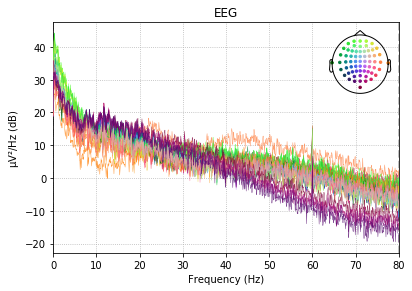

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1057 samples (6.606 sec)

Creating RawArray with float64 data, n_channels=64, n_times=20000
    Range : 0 ... 19999 =      0.000 ...   124.994 secs
Ready.
Effective window size : 12.800 (s)


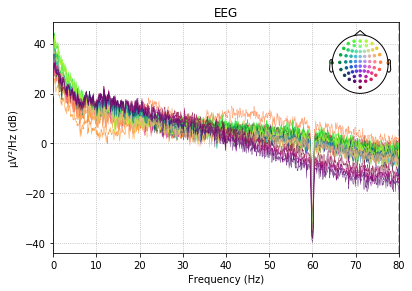

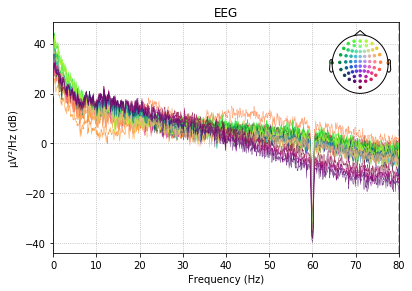

In [11]:
sf = 160
ch_names = Data.ch_names
info = mne.create_info(Data.ch_names, sfreq= sf,ch_types='eeg')
Data.plot_psd()
arr = mne.filter.notch_filter(Data.get_data(), Fs=sf, freqs = 60)
data = mne.io.RawArray(arr, info)
data.set_montage(montage)
#data = data.pick_channels(include)
data.plot_psd()

In [12]:
iir_params = dict(order=4, ftype='butter', output='sos') 
l_freq = 4
h_freq = 8
data.filter(l_freq = l_freq, h_freq = h_freq, method = 'iir', iir_params = iir_params)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 8 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 8.00 Hz: -6.02, -6.02 dB



<RawArray | 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

Effective window size : 12.800 (s)


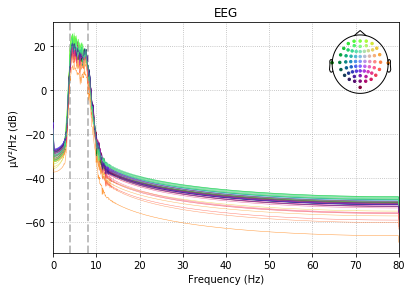

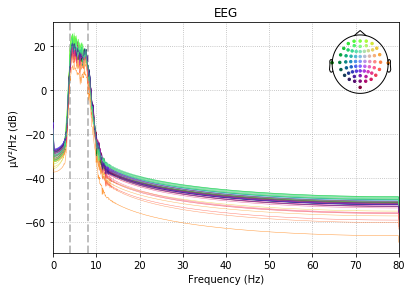

In [13]:
data.plot_psd()

In [14]:
csd = mne.preprocessing.compute_current_source_density(data, stiffness = 4, lambda2 = 0.0001)

Fitted sphere radius:         91.6 mm
Origin head coordinates:      1.0 7.1 49.3 mm
Origin device coordinates:    1.0 7.1 49.3 mm


In [15]:
Data = csd

In [16]:
Data.set_annotations(my_ann)

<RawArray | 64 x 20000 (125.0 s), ~9.9 MB, data loaded>

In [17]:
events, event_id=mne.events_from_annotations(Data)


Used Annotations descriptions: ['T1', 'T2']


In [18]:
epochs=mne.Epochs(Data, events, event_id=event_id, tmin=0, tmax=12, baseline=(None,None))

14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


In [19]:
epochs.info

<Info | 9 non-empty values
 bads: []
 ch_names: FC5, FC3, FC1, FCz, FC2, FC4, FC6, C5, C3, C1, Cz, C2, C4, C6, ...
 chs: 64 CSD
 custom_ref_applied: True
 dig: 67 items (3 Cardinal, 64 EEG)
 highpass: 4.0 Hz
 lowpass: 8.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 160.0 Hz
>

In [20]:
T1=epochs['T1']
T2=epochs['T2']

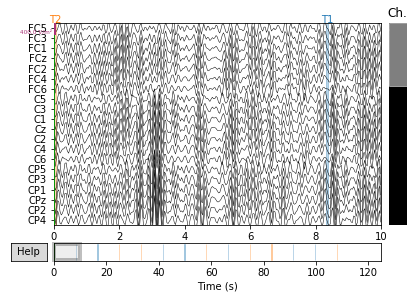

14 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated


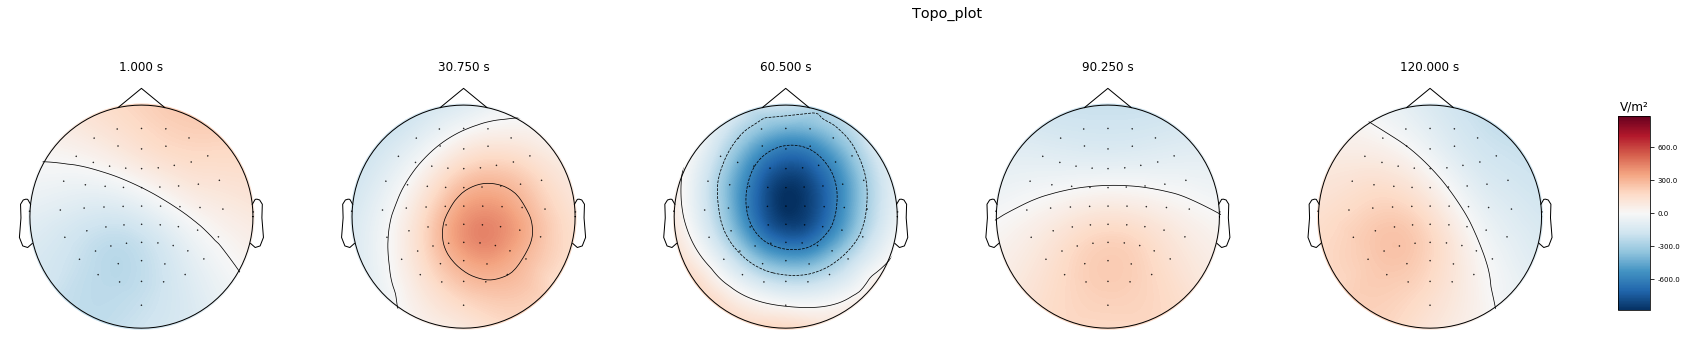

In [21]:
Data.plot()

epochs_params = dict(events=events, event_id=event_id, tmin=0, tmax=120)
eeg_ref=mne.Epochs(Data, **epochs_params, baseline=(None, None)).average()
eeg_ref.plot_topomap(times=np.linspace(1,120,5), size=3., title='Topo_plot', time_unit='s');

Loading data for 7 events and 1921 original time points ...
0 bad epochs dropped
Loading data for 7 events and 1921 original time points ...
Loading data for 7 events and 1921 original time points ...


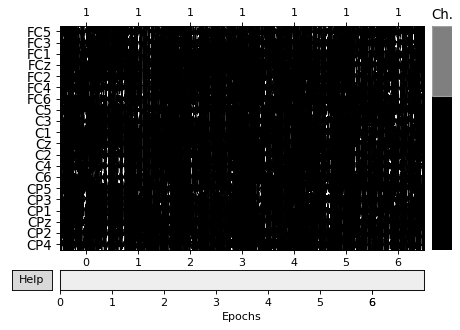

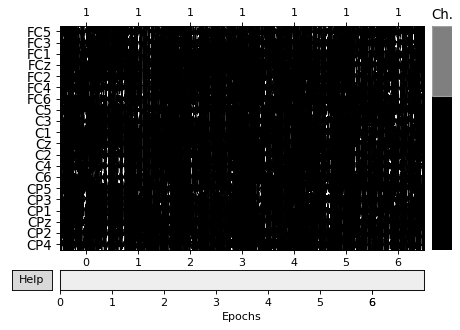

In [22]:
T1.plot()

In [23]:
T1 = T1.get_data()

Loading data for 7 events and 1921 original time points ...


In [43]:
T1.shape

(7, 64, 1921)

In [44]:
from scipy.signal import hilbert as ht

In [45]:
ht = ht(T1)

In [46]:
phase = np.angle(ht)

In [47]:
phase = phase[2,:,:]

In [48]:
phase[1,1]

0.14940475411193435

In [162]:
#calculate plv
plv = np.zeros((64,64))
plvT0 = np.zeros((64,64))
count = 0
for t in range(8*160,12*160):
    for ch in range(64):
        for ch2 in range(ch+1,64):
            inst_phase_diff = np.average(phase[ch,t]-phase[ch2,t])
            plvT0[ch,ch2] += np.absolute(np.exp(-1j*inst_phase_diff))
            count +=1
count = 0
for t in range(4*160,6*160):
    for ch in range(64):
        for ch2 in range(ch+1,64):
            inst_phase_diff = np.average(phase[ch,t]-phase[ch2,t])
            plv[ch,ch2] += np.absolute(np.exp(-1j*inst_phase_diff))
            count +=1

In [100]:
from scipy.sparse.linalg.eigen.arpack import eigsh as largest_eigsh

In [163]:
plv = plv/count
plvT0 =plvT0/count

In [164]:
plv

array([[0.        , 0.00049603, 0.00049603, ..., 0.00049603, 0.00049603,
        0.00049603],
       [0.        , 0.        , 0.00049603, ..., 0.00049603, 0.00049603,
        0.00049603],
       [0.        , 0.        , 0.        , ..., 0.00049603, 0.00049603,
        0.00049603],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00049603,
        0.00049603],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00049603],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

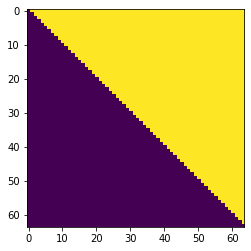

In [103]:
plt.imshow(plvT0)

In [34]:

avg = np.zeros((64,64))
avg2 = np.zeros((64,64))
avg.shape

(64, 64)

In [35]:
count = 0
for i in range (1,1000):
    avg += plv[:,:,i]
    count +=1

IndexError: too many indices for array

In [37]:
count

0

In [ ]:
avg = avg/count
avg2 = avg2/count

In [ ]:
plt.imshow(plv)

In [94]:
a,b= largest_eigsh((plv-plvT0)+(plv-plvT0).T,k=1, which = 'LM')
evc_IT1 = np.squeeze(b);

In [ ]:
a,b= largest_eigsh(avg2+avg2.T,k=1, which = 'LM')
evc_IT2 = np.squeeze(b);

In [ ]:
evc_IT1.shape

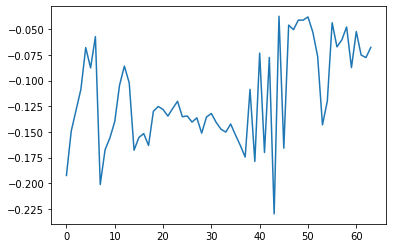

In [95]:
plt.plot(evc_IT1)

In [86]:
evc_IT1


array([ 2.81556680e-01,  2.67958404e-01,  2.03194157e-01,  2.08313631e-01,
        1.05010066e-01,  1.91302687e-01,  1.43798633e-01,  2.04142416e-01,
        1.54795708e-01,  1.46738440e-01,  1.16195822e-01,  1.38253057e-01,
        2.02878854e-01,  2.15536451e-01,  1.24014645e-01,  1.64938929e-01,
        2.23231880e-01,  1.86235469e-01,  1.85387616e-01,  2.05019708e-01,
        2.69179431e-01,  1.69018633e-01,  1.39575176e-01,  1.14845892e-01,
        1.81333995e-01,  1.51574338e-01,  8.03520287e-02,  7.78333871e-02,
        1.05994910e-01,  1.62152720e-01,  1.44420024e-01,  1.04281585e-01,
        8.87372338e-02,  2.51957665e-02,  3.75617043e-02,  1.11197523e-02,
        2.30714172e-02,  3.38518519e-02,  1.22531756e-02,  1.54784295e-02,
       -1.39502421e-02, -5.42038211e-03, -6.00264127e-03,  7.07437361e-03,
        1.40497722e-02,  1.29455869e-02,  1.38096100e-02,  1.63791072e-02,
        1.24758069e-02,  5.74954273e-03, -3.12513655e-03,  3.13361407e-04,
       -3.74995313e-03,  

In [ ]:
evc_IT1 = np.zeros((64,1921))
evc_IT2 = np.zeros((64,1921))

In [ ]:
plv_T1 = np.squeeze(plv_T1)
plv_T2 = np.squeeze(plv_T2)

In [ ]:
plv_T1[:,:,700]+plv_T1[:,:,700].T

In [ ]:
plt.imshow(plv_T1[:,:,700])

In [ ]:
for i in range(1921):
    a,b= largest_eigsh(plv_T1[:,:,i]+plv_T1[:,:,i].T,k=1, which = 'LM')
    #print(np.squeeze(b).shape)
    evc_IT1[:,i] = np.squeeze(b);
    
    a,b= largest_eigsh(plv_T2[:,:,i]+plv_T2[:,:,i].T,k=1, which = 'LM')
    evc_IT2[:,i] = np.squeeze(b);
    

In [ ]:
plt.imshow((evc_IT1), aspect = 'auto')

In [ ]:
plt.imshow((evc_IT1-evc_IT2), aspect = 'auto')